<h1><center> CORREOS SPAM: MODELO LOGÍSTICO </center></h1>

__Autor__:

1. David Montaño Castro.

Clasificar por medio de una regresión logística si un correo es spam o no.

Paqueterías
---

In [1]:
### Pre procesing
import pandas as pd
import numpy as np

### Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Modeling
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Adjustments
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
pd.set_option('display.max_columns', 90)

Importar datos
---

In [2]:
spam = pd.read_csv("T2_spam.csv"); spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Información general
---

### Estructura

Hay 4601 renglones y 68 características, de las cuales 1 es la variable a categorizar.

In [3]:
spam.shape

(4601, 58)

### Data types
Todas las columnas (excepto el las longitudes) corresponden a estructuras de flotantes.

In [4]:
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

### NaN o Null valores.
No existen valores nulos o nan en el conjunto de datos. No hay necesidad de sustituir valores.

In [5]:
spam.isna().sum().where(lambda x: x>0).dropna()

Series([], dtype: float64)

### Descripción
1. A excepción de las últimas 3 variables, esta tabla cuenta las frecuentas con las que aparece cierta palabra en un correo.
2. Las últimas 3 columnas cuentan cuando mide tanto la palabra más larga como la más corta, así como la longitud total del correo.
3. Quizás la siguiente matriz fue calculada con [TT-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [6]:
spam.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


Visualización de los datos (3)
---
Analizaré word_freq_3d, word_freq_george y capital_run_length_total.

### word_freq_3d
Ambos máximo y mínimo para ambos casos son iguales puesto que la mayoría de los documentos analizados no contienen esta palabra. Lo importarte aqué son los _outliers_ que puedan puedan presentarse, pues a diferencia de la mayoría de los casos, aquí nos dan fuerte evidencia para sospechar si un correo es spam o no. Es claro que el los correos __NO SPAM__ esta palabra tiene una frecuencia muy baja en comparación con los valores tan extremos que toma en los correos __SPAM__. Como conclusión, es indudable que los correos que contienen esta palabra, con frecuencia, se tratan de correos __SPAM__.

Text(0.5, 1.0, 'Frecuencia de 3d')

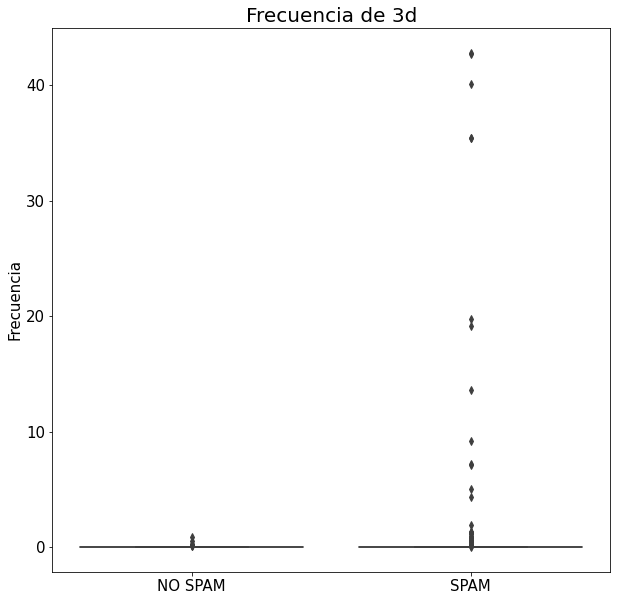

In [7]:
sns.boxplot(y = spam.word_freq_3d, x = spam.spam)
plt.xticks(list(range(0,2)),["NO SPAM","SPAM"], size = 15)
plt.yticks(size = 15)
plt.ylabel("Frecuencia", size = 15)
plt.xlabel("")
plt.title("Frecuencia de 3d", size = 20)

### word_freq_george
Este es al caso totalmente a la inversa del caso anterior, pues la palabra _george_ que bien se puede tratar de un nombre propio, con frecuencia se encuentra en correos que son __NO SPAM__. Se concluye que muy frecuentemente, los correos que contienen la palabra _george_ son __NO SPAM__.

Text(0.5, 1.0, 'Frecuencia de george')

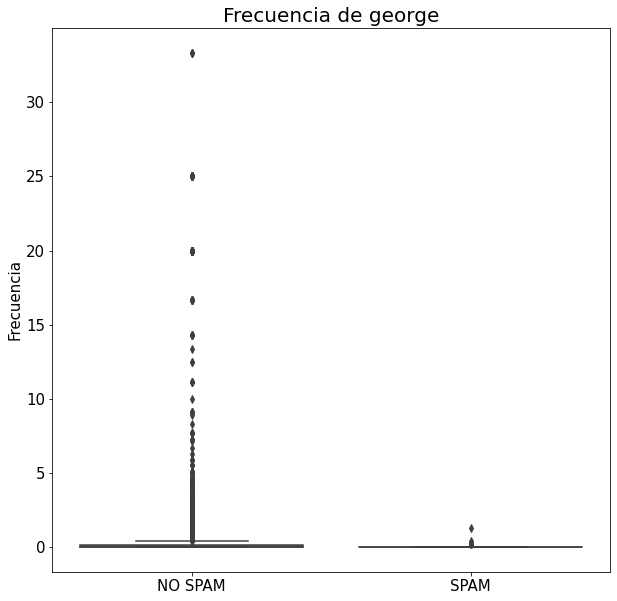

In [8]:
sns.boxplot(y = spam.word_freq_george, x = spam.spam)
plt.xticks(list(range(0,2)),["NO SPAM","SPAM"], size = 15)
plt.yticks(size = 15)
plt.ylabel("Frecuencia", size = 15)
plt.xlabel("")
plt.title("Frecuencia de george", size = 20)

### capital_run_length_total
En este caso no se miden frecuencias de palabras, si no de longitudes de documentos enteros. Se nota una clara tendencia a tener más textos largos cuando se tratan de correos __SPAM__. Tan solo comparando los valores más extremos de ambas boxplots, existe una diferencia de 10,000 palabras, siendo el mayor un correo spam. Suponiendo que se retiran los 2 valores más extremos de los correo __NO SPAM__ y los 3 de __SPAM__, entonces se logra ver que aún con esto, los valores tienden a ser más grandes en la distribución de la derecha. Más del 750% de los correos __SPAM__ son mayores que el 50% de los __NO SPAM__, un contraste bastante importante.

En conclusión, los correos __SPAM__ con frencuencia son más largos que los __NO SPAM__.

Text(0.5, 1.0, 'Longitud del documento')

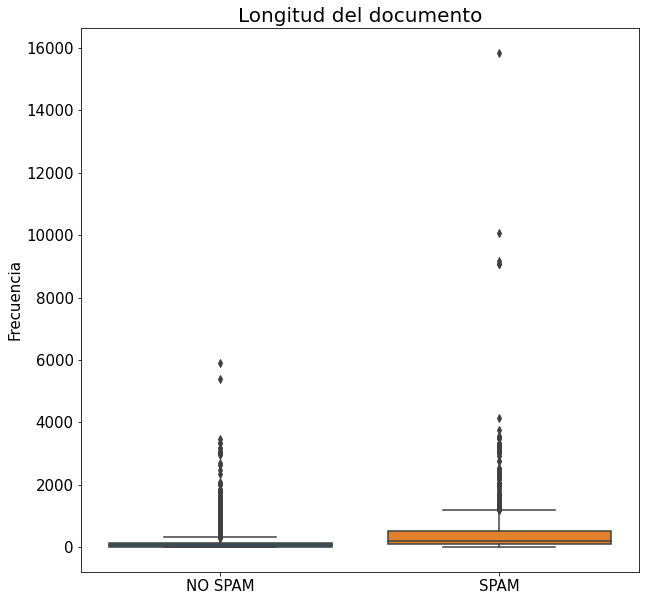

In [9]:
sns.boxplot(y = spam.capital_run_length_total, x = spam.spam)
plt.xticks(list(range(0,2)),["NO SPAM","SPAM"], size = 15)
plt.yticks(size = 15)
plt.ylabel("Frecuencia", size = 15)
plt.xlabel("")
plt.title("Longitud del documento", size = 20)

Separar los datos
---

In [10]:
X = spam.drop(columns = "spam")
Y = spam.spam

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 0, test_size = .4)

Modelado
---

### Sin regularización

In [11]:
log_sin = LogisticRegression(penalty = "none", max_iter = 400)
log_sin.fit(X_train, Y_train)

C:\Users\actda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty='none')

#### Predicciones

In [12]:
Y_pred = log_sin.predict(X_test)

#### Score
El 93% de los datos de entrenamiento fueron bien predichos por el modelo.

In [13]:
round(log_sin.score(X_train, Y_train) * 100, 2)

93.37

#### Accuracy
El 91% de los datos de prueba fueron bien predichos por el modelo, 2% menor que el Score.

In [14]:
round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2)

91.31

#### Matriz de confusión.


In [15]:
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
(tn,fp,fn,tp)

(1032, 65, 95, 649)

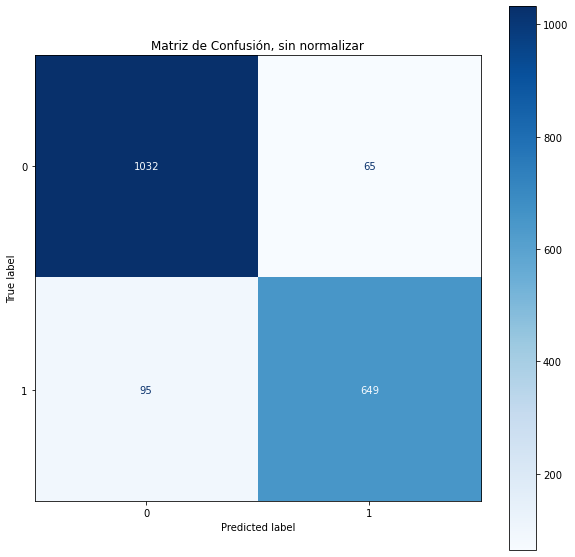

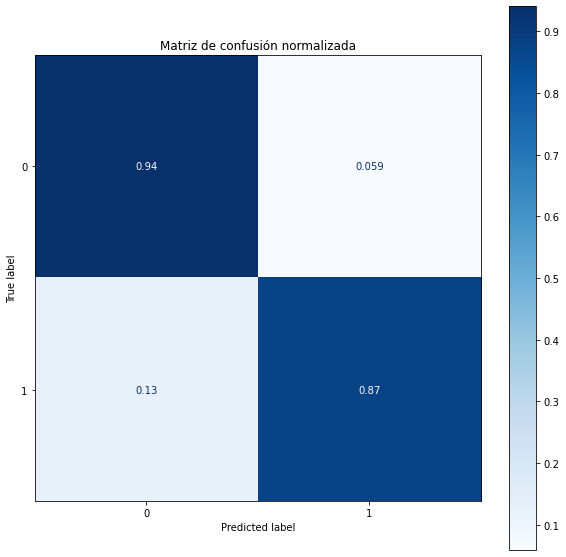

In [16]:
titles_options = [("Matriz de Confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_sin, X_test, Y_test,
                                 #display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Sensibilidad

In [17]:
m1 = round(100*(tp/(tp+fn)), 2);m1

87.23

#### Especifidad

In [18]:
m2 = round(100*(tn/(tn+fp)), 2);m2

94.07

#### Tasa de falsos positivos

In [19]:
m3 = round(100*(fp/(tn+fp)), 2);m3

5.93

#### Precisión

In [20]:
m4 = round(100*(tp /(tp+fp)), 2);m4

90.9

#### Tasa de respuestas incorrectas

In [21]:
m5 = round(100*((fn + fp)/(tn+fp+fn+tp)), 2);m5

8.69

#### Prevalencia

In [22]:
m6 = round(100*((fn + tp)/(tn+fp+fn+tp))); m6

40.0

### Con regularización

In [23]:
log_con = LogisticRegression(penalty = "l2", max_iter = 400)
log_con.fit(X_train, Y_train)

C:\Users\actda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400)

#### Predicciones

In [24]:
Y_pred = log_con.predict(X_test)

#### Score
El 93% de los datos de entrenamiento fueron bien predichos por el modelo.

In [25]:
round(log_con.score(X_train, Y_train) * 100, 2)

93.15

#### Accuracy
El 91% de los datos de prueba fueron bien predichos por el modelo, 2% menor que el Score. En comparación al modelo sin regularización, por decimas (16) este modelo clasifica mejor los valores de prueba.

In [26]:
round(metrics.accuracy_score(Y_test, Y_pred) * 100, 2)

91.47

#### Matriz de confusión.


In [27]:
tn,fp,fn,tp = confusion_matrix(Y_test,Y_pred).ravel()
(tn,fp,fn,tp)

(1039, 58, 99, 645)

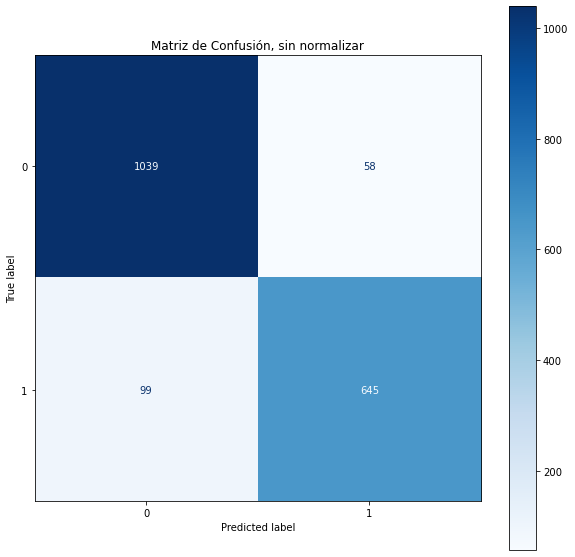

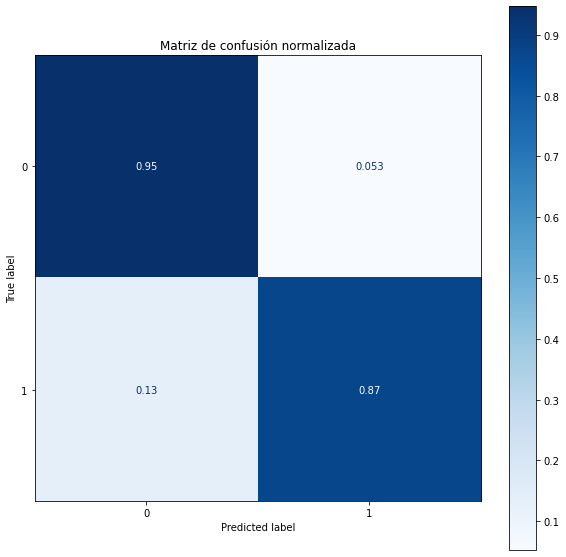

In [28]:
titles_options = [("Matriz de Confusión, sin normalizar", None),
                  ("Matriz de confusión normalizada", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(log_con, X_test, Y_test,
                                 #display_labels=[0,1],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()

#### Sensibilidad

In [29]:
m7 =round(100*(tp/(tp+fn)), 2);m7

86.69

#### Especifidad

In [30]:
m8 = round(100*(tn/(tn+fp)), 2);m8

94.71

#### Tasa de falsos positivos
Tasa de falsos positivos = 1 - Especifidad  

In [31]:
m9 = round(100*(fp/(tn+fp)), 2);m9

5.29

#### Precisión

In [32]:
m10 = round(100*(tp /(tp+fp)), 2);m10

91.75

#### Tasa de respuestas incorrectas

In [33]:
m11 = round(100*((fn + fp)/(tn+fp+fn+tp)), 2);m11

8.53

#### Prevalencia

In [34]:
m12 = round(100*((fn + tp)/(tn+fp+fn+tp)));m12

40.0

Conclusiones
---

Se trató de ajustar un modelo de clasificación para decidir si un correo electrínico era __SPAM__ o __NO SPAM__. Ante esta situación, debes tener claro que no lidiamos con un problema tipo "enfermedad", en los que particularmente se espera reducir un error tipo 1. Ahora, en este caso, importa tanto reducir el error tipo 1 como el tipo 2:
1. Si suponemos que mi clasificador comete más errores clasificando correos __SMAP__ cuando realmente eran __NO SPAM__, esto significa que el usurio podría perder un correo importante a causa de esto. 
2. Si suponemos que mi clasificador comete más errores clasificando correos __NO ESPAM__ cuando realmente eran __SPAM__, esto significa que el usuario perderá mucho tiempo checando correos que son o promociones o estafas. 

Dicho lo anterior, se analizarán cada una de las métricas calculadas:

1. __Sensibilidad__: La sensiblidad es mayor en el modelo __SIN REGULARIZACIÓN__. Esto quiere decir que de todos los casos reales de correos __SPAM__, el modelo detecto correctamente el 87.23%.
2. __Especifidad__: La especifidad es mayor en el modelo __CON REGULARIZACIÓN__. Esto quiere decir que de todos los casos reales de correos __NO SPAM__, el modelo detecto correctamente el 94.71%.

La diferencia entre la especifidad de ambos modelos no es tan significativa. Por lo tanto, hasta el momento, consideraría un mejor modelo el __SIN REGULARIZACIÓN__.

3. __Tasa de Falsos Positivos__: La tasa de falsos positivos es menor en el modelo __CON REGULARIZACIÓN__. Esto quiere decir que de todos los casos reales de correos __NO SPAM__, el modelo detecto incorrectamente 5.29%.

4. __Precisión__: La precisión es mayor en el modelo __CON REGULARIZACIÓN__. Esto quiere decir que de todos los casos predichos de correos  __SPAM__, en realidad el 91.75% de ellos eran __SPAM__.

5. __Respuestas incorrectas__: La tasa de respuestas incorrectas es menor en el modelo __CON REGULARIZACIÓN__. Esto quiere decir que el modelo se equivocó en el 8.53% de todos los casos.

6. __Prevalencia__: La prevalencia en ambos modelos es la misma porque se están ocupando las mismas proporciones (mismos splits).

Con todo lo anterior, se puede llegar a la conclusión de que el modelo __CON REGULARIZACIÓN__ es mejor que el otro modelo, solo siendo superado en cuanto a la sensibilidad por un margen de .51%. Definitivamente uno debería optar por el modelo __CON REGULARIZACIÓN__, pero también es importante considerar qué es lo que se desea.



In [35]:
resumen = pd.DataFrame({"Con":[m7,m8,m9,m10,m11,m12],"Sin":[m1,m2,m3,m4,m5,m6]},
                       index =["Sensibilidad","Especifidad","Tasa Falsos Positivos","Precisión", 
                              "Respuestas Incorrectas","Prevalencia"] );resumen

,Con,Sin
Sensibilidad,86.69,87.23
Especifidad,94.71,94.07
Tasa Falsos Positivos,5.29,5.93
Precisión,91.75,90.90
Respuestas Incorrectas,8.53,8.69
Prevalencia,40.00,40.00
